# 

# Intro to Scikit-Learn

From:

* [VanderPlas, Jake. 2017. Python Data Science Handbook. O’Reilly Media, Inc.](https://github.com/jakevdp/PythonDataScienceHandbook)
* [Scikit-Learn datasets: The Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

## Regression

### Data

https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset


Features:

* `age`: age in years
* `sex`
* `bmi`: body mass index
* `bp`: average blood pressure
* `s1`: tc, total serum cholesterol
* `s2`: ldl, low-density lipoproteins
* `s3`: hdl, high-density lipoproteins
* `s4`: tch, total cholesterol / HDL
* `s5`: ltg, possibly log of serum triglycerides level
* `s6`: glu, blood sugar level

Target:

* Quantitative measure of disease progression one year after baseline

In [1]:
import platform

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets, utils

In [2]:
if platform.system() == "Darwin":
    %config InlineBackend.figure_format="retina"  # For high DPI display

print(sklearn.__version__)  # Version tested on sklearn.__version__ == 1.1.3

1.1.3


#### Data loading

In [3]:
diabetes = datasets.load_diabetes()

In [4]:
type(diabetes)

sklearn.utils._bunch.Bunch

In [5]:
# utils.Bunch?

In [6]:
dir(diabetes)

['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [7]:
type(diabetes.data)

numpy.ndarray

In [8]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [9]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

#### Data selection for training

Load data in a pandas `DataFrame` and select `s3` as single feature for prediction, and `target` as target into `xs` and `ys`, respectively.

Note: Expected shapes for features and labels (target values):

![](img/05.02-samples-features.png)

<span style="color:red">Implement your solution below</span>

In [10]:
FTS = ["s3"]

In [11]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [12]:
xs = df[FTS].values
ys = df.target.values
print(xs.shape, ys.shape)

(442, 1) (442,)


#### Plot the feature against the target

<span style="color:red">Implement your solution below</span>

In [13]:
# plt.scatter(xs, ys)
# plt.show()


Or using the Matplotlib pandas' API:

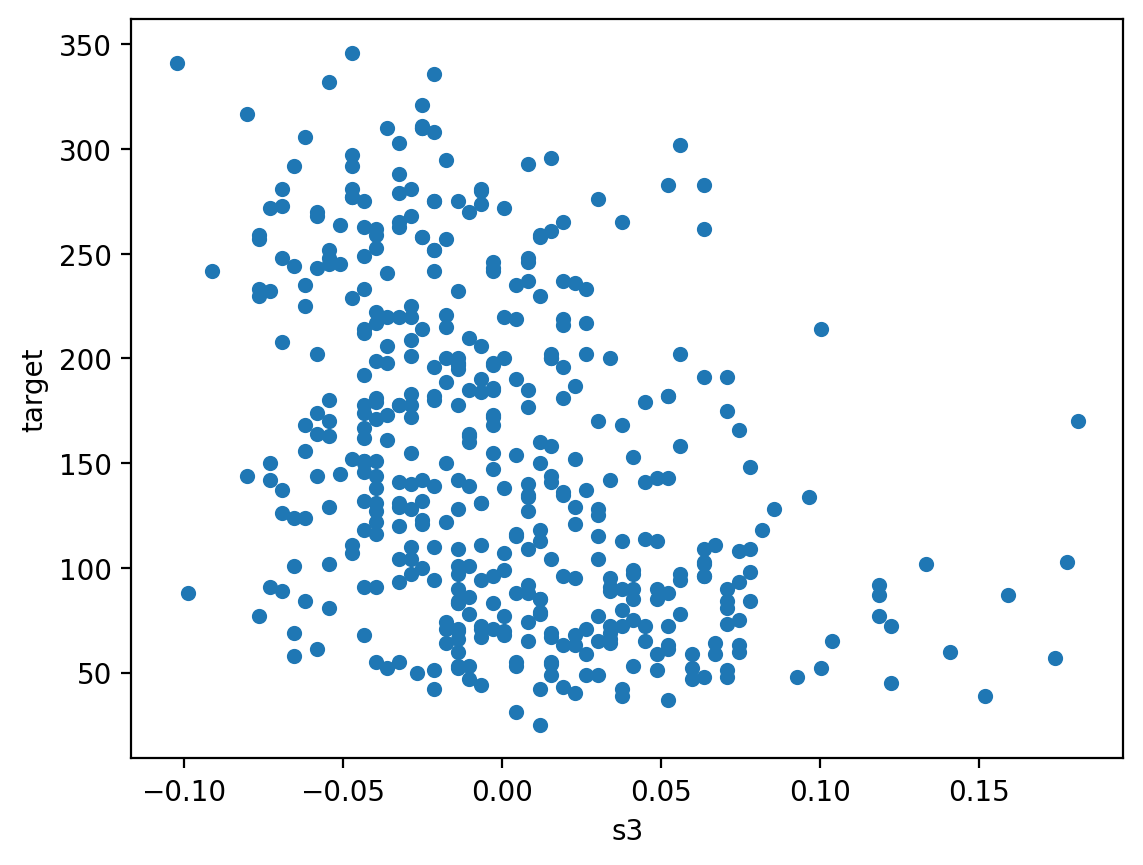

In [14]:
df.plot.scatter(x=FTS[0], y="target")
plt.show()

##### Random selection of training and test sets

<span style="color:red">Implement your solution below</span>

In [15]:
from sklearn.model_selection import train_test_split

xs_train, xs_test, ys_train, ys_test = train_test_split(
    df[FTS], df["target"], random_state=1
)

### Training

<span style="color:red">Implement your solution below</span>

In [16]:
# 1. Model choice (import)
from sklearn.linear_model import LinearRegression

# 2. Instantiation
model = LinearRegression()

# 3. Learn (fit) the model
model.fit(xs_train, ys_train)

# 4. Predict on new data
ys_pred = model.predict(xs_test)

### Results

#### Plots

<span style="color:red">Implement your solution below</span>

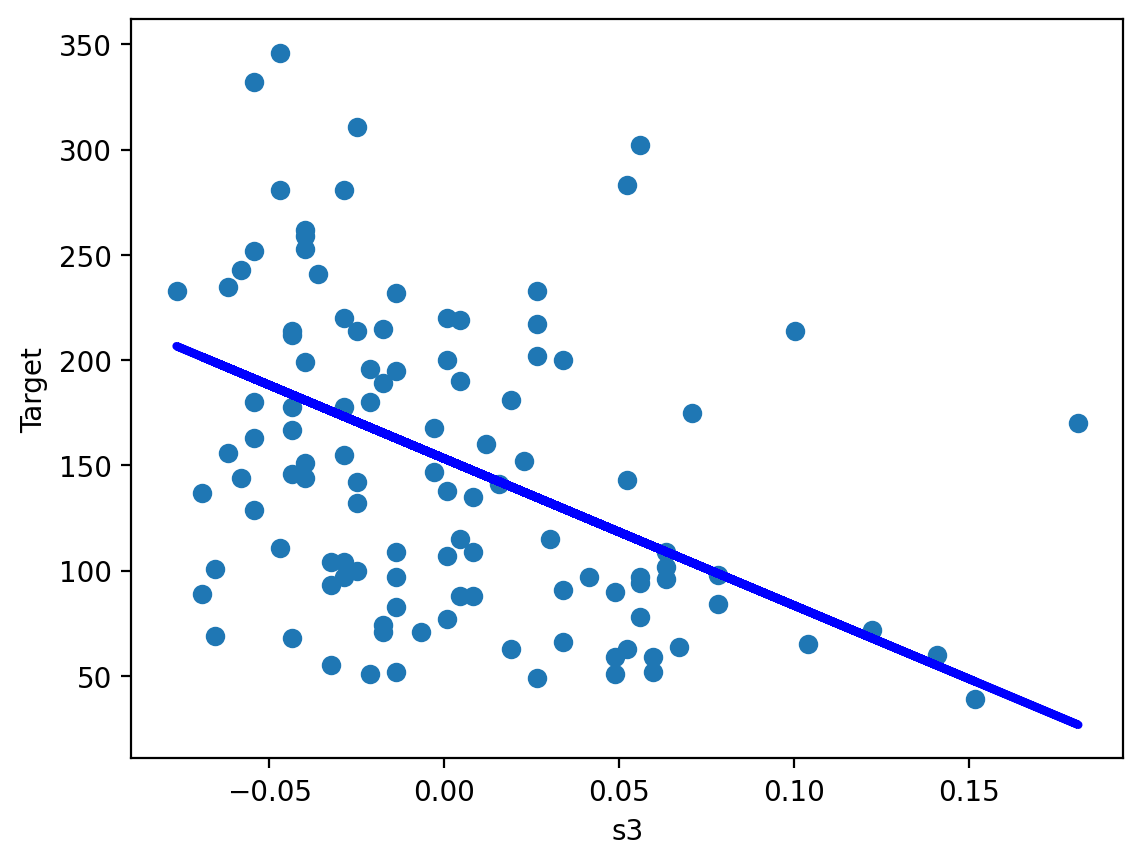

In [17]:
plt.scatter(xs_test, ys_test)
plt.plot(xs_test, ys_pred, color="blue", linewidth=3)
plt.xlabel(FTS[0])
plt.ylabel("Target")
plt.show()

#### Evaluations

* [Mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error)
* [Coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)

<span style="color:red">Implement your solution below</span>

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(ys_test, ys_pred)
r2 = r2_score(ys_test, ys_pred)

print(f"MSE = {mse:.2f}")
print(f"R^2 = {r2:.4f}")

MSE = 4729.79
R^2 = 0.0941


**Note:** the $R^2$ value can be obtained directly from the `model` object

In [19]:
r2_ = model.score(xs_test, ys_test)
print(f"R^2 = {r2_:.4f}")

R^2 = 0.0941


### Non-linear approaches

* Adapt linear regression by transforming data according to basis functions
* E.g., with a polynomial projection:
    $$\hat{y} = a_0 + a_1 x + a_2 x^2 + \cdots + a_n x^n$$
* Note that this is still a linear model
* It is linear in the sense that we never multiply or divide the coefficients
* The one-dimensional descriptor $x$ is projected in one or more dimensions to allow modeling more complex relations between $x$ and $y$

<span style="color:red">Implement your solution below</span>

In [20]:
def apply_poly_basis(arr, deg=2):
    """
    >>> arr = np.arange(1., 4.).reshape(-1, 1)
    >>> arr   # Format expected by sklearn
    array([[1.],
           [2.],
           [3.]])
    >>> apply_poly_basis(arr, deg=3)
    array([[ 1.,  1.,  1.],
           [ 2.,  4.,  8.],
           [ 3.,  9., 27.]])
    """
    assert arr.ndim == 2

    arrs = [arr ** n for n in range(1, deg + 1)]

    return np.hstack(arrs)

Or taking advantage of the pandas `DataFrame` structure:

In [21]:
def apply_poly_basis_df(df, deg=2):
    df_ = df.copy()
    for n in range(deg + 1):
        if n >= 2:
            df_[df.columns + f"^{n}"] = df ** n
    return df_

In [22]:
DEG = 7

poly_df = apply_poly_basis_df(df[FTS], deg=DEG)

In [23]:
poly_df.head()

,s3,s3^2,s3^3,s3^4,s3^5,s3^6,s3^7
0,-0.043401,0.001884,-8.175128e-05,3.548075e-06,-1.539894e-07,6.683272e-09,-2.900597e-10
1,0.074412,0.005537,4.120228e-04,3.065926e-05,2.281404e-06,1.697628e-07,1.263232e-08
2,-0.032356,0.001047,-3.387363e-05,1.096013e-06,-3.546252e-08,1.147423e-09,-3.712594e-11
3,-0.036038,0.001299,-4.680222e-05,1.686638e-06,-6.078235e-08,2.190448e-09,-7.893843e-11
4,0.008142,0.000066,5.397674e-07,4.394832e-09,3.578309e-11,2.913489e-13,2.372187e-15


In [24]:
xs_train_b, xs_test_b, ys_train, ys_test = train_test_split(
    poly_df, df["target"], random_state=1
)

### Training

<span style="color:red">Implement your solution below</span>

In [25]:
# 1. Model choice (import)

# 2. Instantiation
model_b = LinearRegression()

# 3. Learn (fit) the model
model_b.fit(xs_train_b, ys_train)

# 4. Predict on new data
ys_pred_b = model_b.predict(xs_test_b)

#### Plots

Construction of an `array` with increasing values that extend from the lower and upper bounds of the data to produce the result of the regression on the graph.

<span style="color:red">Implement your solution below</span>

In [26]:
def plot_regression_line(xs_df, model, deg=None):
    # The limit values of the features' 1st column
    x_min, x_max = xs_df.min()[0], xs_df.max()[0]

    # Create the vect that spans the amplitude of data values (with 50 points)
    xx_df = pd.DataFrame(np.linspace(x_min, x_max), columns=[xs_df.columns[0]])

    print(xx_df.shape)

    # Concatenation of the selected feature and its squared version
    if deg is not None:
        xx_df = apply_poly_basis_df(xx_df, deg=deg)

    # Prediction using the model to produce the regression
    yy_pred = model.predict(xx_df)

    plt.plot(xx_df.iloc[:, 0], yy_pred, color="blue", linewidth=3)

(50, 1)


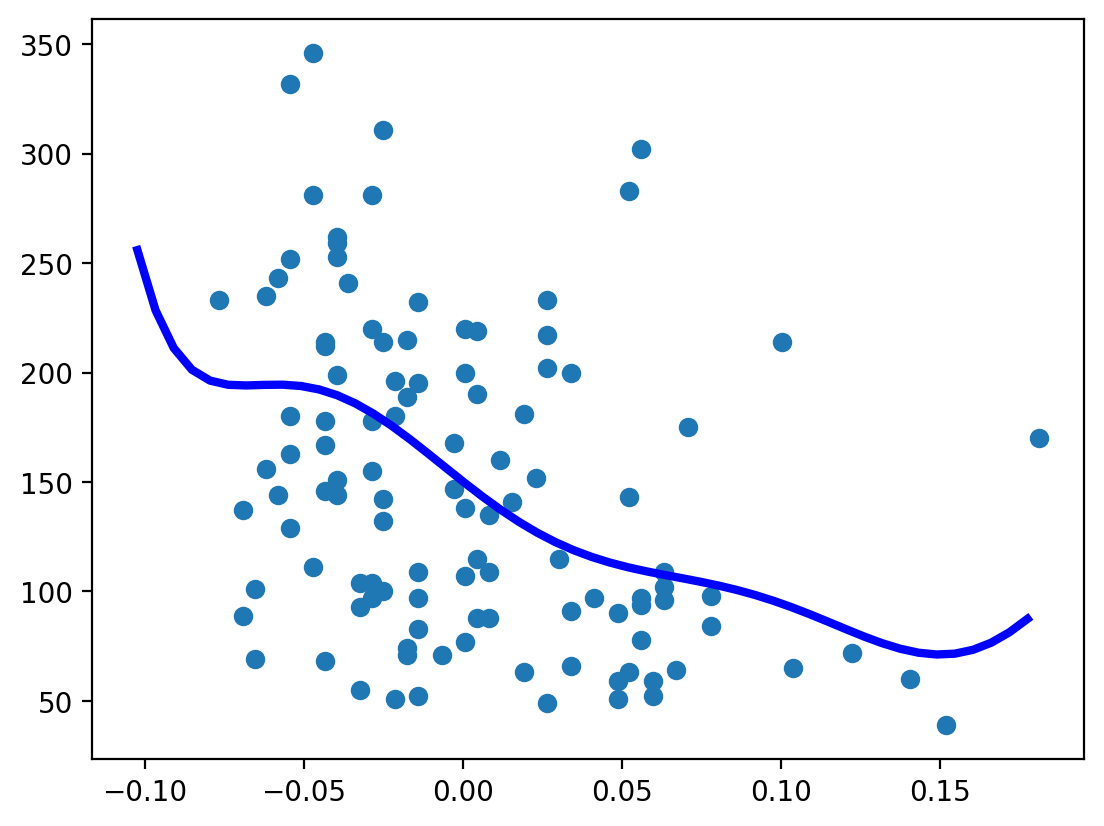

In [27]:
plot_regression_line(xs_train_b, model=model_b, deg=DEG)
plt.scatter(xs_test_b.iloc[:, 0], ys_test)
plt.show()

#### Evaluations

<span style="color:red">Implement your solution below</span>

In [28]:
mse = mean_squared_error(ys_test, ys_pred_b)
r2 = r2_score(ys_test, ys_pred_b)

print(f"MSE = {mse:.2f}")
print(f"R^2 = {r2:.4f}")

MSE = 4614.72
R^2 = 0.1162


Print coefficients $a_1$ and $a_2$ from the regression, as in:

$$\hat{y}^{(i)} = a_0 + a_1 x_1^{(i)} + a_2 x_2^{(i)}$$

In [29]:
params_df = pd.DataFrame(
    model_b.coef_, index=poly_df.columns, columns=["Parameters"]
)

with pd.option_context("display.float_format", "{:.3g}".format):
    display(params_df)

,Parameters
s3,-1.15e+03
s3^2,3.39e+03
s3^3,1.56e+05
s3^4,-1.24e+06
s3^5,-8.95e+06
s3^6,1.09e+08
s3^7,-2.57e+08


Trick: Generation of markdown table from pandas DataFrame

In [30]:
print(params_df.applymap("{:.2e}".format).to_markdown())

|      |    Parameters |
|:-----|--------------:|
| s3   |  -1150        |
| s3^2 |   3390        |
| s3^3 | 156000        |
| s3^4 |     -1.24e+06 |
| s3^5 |     -8.95e+06 |
| s3^6 |      1.09e+08 |
| s3^7 |     -2.57e+08 |


|      |    Parameters |
|:-----|--------------:|
| s3   |  -1150        |
| s3^2 |   3390        |
| s3^3 | 156000        |
| s3^4 |     -1.24e+06 |
| s3^5 |     -8.95e+06 |
| s3^6 |      1.09e+08 |
| s3^7 |     -2.57e+08 |

One can see that the absolute value of the coefficients is more important for the first 3 features.

**Note**:

* This does not mean, however, that they necessarily have more impact on the value of $\hat{y}$

* The features $x_j$ not being *standardized*

* If some have a greater variance, the same value of coefficient $a_j$ will imply a greater impact on $\hat{y}$

## Further exercise

#### Goal: Try to improve the result of the linear regression

* Perform the linear regression again using the set of 10 features proposed, instead of just one. The selection is made from the stage: [Selection of training data](#Selection-of-training-data)

* Generate other features by taking, for example, the square of their values, to take into account the non-linearity of the relations

* Evaluate the performance of the regression in terms of MSE and $R^2$

* Identify the features that seem the most significant for this regression, by observing the value of their respective parameter ($a_j$ via `model.coef_`)

* Comment succinctly

* Note that visualization poses a problem when using more than one descriptor (more than 2 in particular), so it is not necessary for this exercise

<span style="color:red">Implement your solution below</span>

This wasn't included in the exercise, but a good idea for improving the modeling for most ML algorithms is to *standardize* your data. 
It also helps to estimate the influence of various features by analyzing the parameter values, as shown at the end of the notebook.

In [31]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

std_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
# ys = scaler.fit_transform(ys.reshape(-1, 1))  # Format colonne pour le scaler

In [32]:
std_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989,-0.014719
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479,-1.001659
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154,-0.144580
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823,0.699513
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568,-0.222496


In [33]:
xs_train, xs_test, ys_train, ys_test = train_test_split(
    std_df.loc[:, :"s6"], std_df["target"], random_state=1
)

In [34]:
model_all = LinearRegression()

model_all.fit(xs_train, ys_train)

ys_pred = model_all.predict(xs_test)

In [35]:
mse = mean_squared_error(ys_test, ys_pred)
r2 = r2_score(ys_test, ys_pred)

print(f"MSE = {mse:.2f}")
print(f"R^2 = {r2:.4f}")

MSE = 0.49
R^2 = 0.4440


#### Apply polynomial bases on the whole dataset 

In [36]:
DEG = 2

std_poly_df = apply_poly_basis_df(df.loc[:, :"s6"], deg=DEG)

scaler = preprocessing.StandardScaler()
std_poly_df = pd.DataFrame(
    scaler.fit_transform(std_poly_df), columns=std_poly_df.columns
)

In [37]:
xs_train, xs_test, ys_train, ys_test = train_test_split(
    std_poly_df.iloc[:, :-1], std_df["target"], random_state=1
)

In [38]:
model_all = LinearRegression()

model_all.fit(xs_train, ys_train)

ys_pred = model_all.predict(xs_test)

In [39]:
mse = mean_squared_error(ys_test, ys_pred)
r2 = r2_score(ys_test, ys_pred)

print(f"MSE = {mse:.2f}")
print(f"R^2 = {r2:.4f}")

MSE = 0.53
R^2 = 0.4023


In [40]:
params_df = pd.DataFrame(
    model_all.coef_,
    index=std_poly_df.iloc[:, :-1].columns,
    columns=["Parameters"],
)

with pd.option_context("display.float_format", "{:.3g}".format):
    display(params_df.sort_values(by="Parameters", ascending=False, key=abs))

,Parameters
s1,-3.35
s2,2.81
s5,1.46
s3,1.16
s5^2,0.418
bmi,0.32
s2^2,-0.207
bp,0.188
s1^2,0.142
s4,0.126


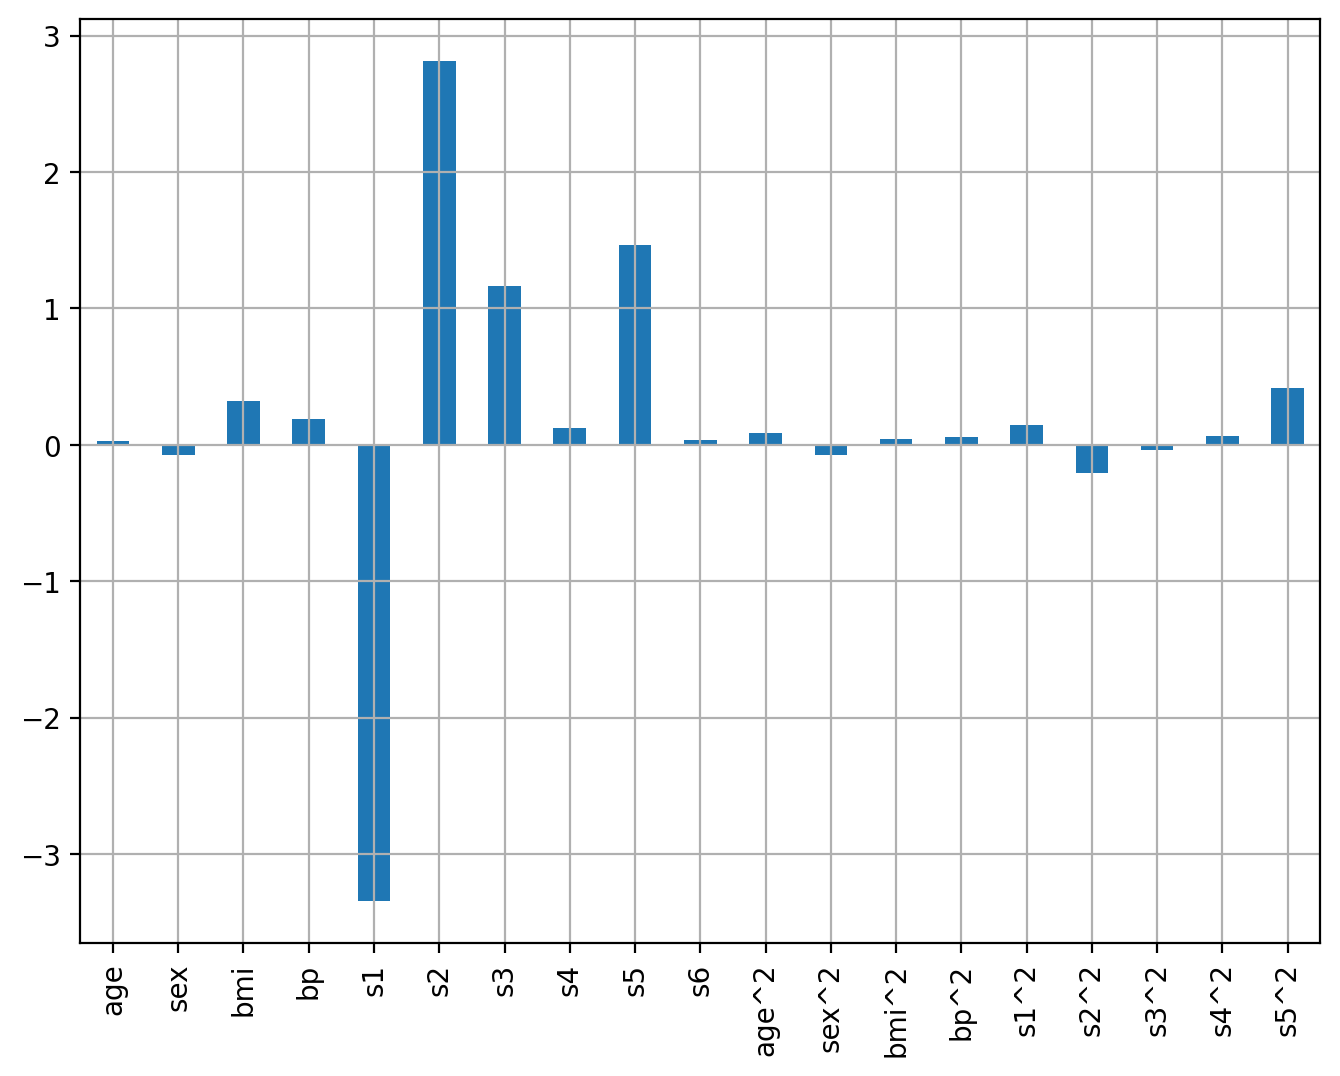

In [41]:
params_df.plot(kind="bar", legend=False, grid=True, figsize=(8, 6))
plt.show()
  # display(params_df.sort_values(by="Parameters", ascending=False, key=abs))

---